## Машинное обучение – весна 2024
## Домашнее задание 1: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
# в данных нет пропусков
X.isna().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

In [ ]:
# если бы пропуски были
X_no_mis = X.dropna()
X_no_mis.head(8)

In [ ]:
# в наборе нет категориальных признаков
sum(X.dtypes == "object")

In [ ]:
# если бы признаки были
X_dum = pd.get_dummies(X, drop_first = True)
X_dum.head(8)

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# выбор признаков
X_train_sel = X_train[["alcohol", "magnesium"]]
X_test_sel = X_test[["alcohol", "magnesium"]]

# масштабирование признаков
scaler = StandardScaler()
scaler.fit(X_train_sel)
X_train_transform = scaler.transform(X_train_sel)
X_test_transform = scaler.transform(X_test_sel)

# обучение классификатора и предсказания
number_of_neighbours = np.array([1, 3, 5, 10, 15, 25])
test, train, clfs = [], [], []

for i in range(len(number_of_neighbours)):
    k = number_of_neighbours[i]
    clf = KNeighborsClassifier(n_neighbors = k).fit(X_train_transform, y_train)
    clfs.append(clf)
    y_predicted_train = clf.predict(X_train_transform)
    y_predicted = clf.predict(X_test_transform)
    
    train.append(np.mean(y_predicted_train == y_train).round(2))
    test.append(np.mean(y_predicted == y_test).round(2))
    
pd.DataFrame({'NN': number_of_neighbours, 'Train': train, 'Test': test})

**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(20,10))

labels = []

for i in range(len(number_of_neighbours)):
    k = number_of_neighbours[i]
    labels.append(f'n_neighbours = {k}')
    
for clf, lab, grd in zip(clfs,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_transform, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

По результатам задачи 1.3 наибольшую долю верных ответов (accuracy) на тестовой выборке имеет число соседей равное 10. 
Из графиков задачи 1.5 можно прийти к схожим выводам. При k = 1 модель переобучена, так как каждый (даже отдельно стоящий - скорее всего шумовой) элемент обучающей выборки порождает область "своего цвета". Это говорит о том что модель плохо отражает общую картину расположения объектов тренировочной выборки. Примерно то же самое можно сказать про k = 3 - отдельно взятые небольшие группы объектов сильно влияют на конфигурацию решающей поверхности. При k = 25 модель напротив недообучена, так как данные довольно сильно перемешаны и график плохо отражает расположение объектов тренировочной выборки.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

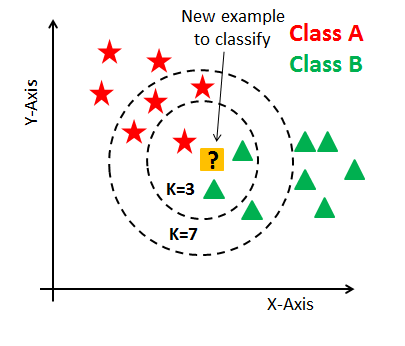

In [ ]:
import numpy as np
from collections import Counter 
from sklearn.base import BaseEstimator

class KNN(BaseEstimator):
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        answer = []
        for x in X:
            distances = []
            for el in self.X:
                distances.append(np.sqrt(np.sum((x-el)*(x-el))))
            distances = np.array(distances)
            nearest_ind = np.argsort(distances)[:self.k]
            nearest_ans = self.y[nearest_ind]
            c = Counter(nearest_ans)
            answer.append(max(c, key=c.get))
        return np.array(answer)

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия своими руками.

В этом задании мы попробуем реализовать алгоритм линейной регрессии своими руками и рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

Мы будем решать задачу на примере предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.0 (2 балла)** Реализуйте алгоритм линейной регресии (базовой, без регуляризации)

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator

class Linreg(BaseEstimator):    
    def fit(self, X, y):
        Xl = np.hstack((np.ones((X.shape[0], 1)), X))
        Xl_t = np.transpose(Xl)
        w = np.dot(np.dot(np.linalg.inv(np.dot(Xl_t, Xl)), Xl_t), y)
        self.w = w[1:]
        self.const = w[0]
    
    def predict(self, X):
        return np.dot(X, self.w) + self.const

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [ ]:
# в данных нет пропусков
data.isna().any()

In [ ]:
# если бы пропуски были
data_no_mis = data.dropna()
data_no_mis.head(5)

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
# бессмысленный столбец - столбец с нумерацией, так как он не несет никакой информации для определения цены бриллианта, и у DataFrame есть собственная нумерация
data = data.drop('Unnamed: 0', axis = 1)
data.head(5)

**Задача 3.3 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
# выбор вещественных признаков
cat_feature_mask = (data.dtypes == "object").values
data_real = data[data.columns[~cat_feature_mask]]

# корелляция между целевой переменной price и признаками
print(data_real.corrwith(data_real['price']), '\n')

print(data.corr)

Сильнее всего с целевой переменной кореллериуют количество карат и размеры алмаза по x, y, z.

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
# в наборе есть категориальные признаки
sum(data.dtypes == "object")

In [ ]:
# OneHot-кодирование
data_dum = pd.get_dummies(data, drop_first = True, dtype = int)
data_dum.head(5)

**Задача 3.5 (0.1 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
from sklearn.model_selection import train_test_split

X = data_dum.drop(['price'], axis = 1)
y = data_dum['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

**Задача 3.6 (0.1 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler

real_columns = np.array(data.dtypes[data.dtypes == 'float64'].index)

X_train_transform = X_train.copy()
X_test_transform = X_test.copy()

scaler = StandardScaler()
scaler.fit(X_train_transform[real_columns])

X_train_transform[real_columns] = scaler.transform(X_train_transform[real_columns])
X_test_transform[real_columns] = scaler.transform(X_test_transform[real_columns])

**Задача 3.7 (0.1 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()
linreg.fit(X_train_transform, y_train)
y_predict_train = linreg.predict(X_train_transform)
y_predict = linreg.predict(X_test_transform)

# mean squared error на тренировочной и тестовой выборках
print(f'MSE на тренировочной выборке: {mean_squared_error(y_train, y_predict_train).round(2)}')
print(f'MSE на тестовой выборке: {mean_squared_error(y_test, y_predict).round(2)}')

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
from sklearn.linear_model import LinearRegression

# оценки коффициентов
lr = LinearRegression().fit(X_train_transform, y_train)
print(lr.coef_, '\n')

# вещественные переменные, оценки коэффициентов которых по модулю на порядок больше
deg = np.log10(abs(lr.coef_[:6])).astype(int)
X_train_real = X_train.columns[:6]
names = X_train_real[deg == max(deg)]
print(*names)

**Задача 3.9 (0.2 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Ridge, Lasso

lasso = Lasso(10).fit(X_train_transform, y_train)
ridge = Ridge(10).fit(X_train_transform, y_train)

print(f'Lasso-регрессия:\n {lasso.coef_} \n')
print(f'Ridge-регрессия:\n {ridge.coef_} \n')

print(f'Отличие весов Lasso-регрессии от весов линейной регрессии: {np.mean(lr.coef_ - lasso.coef_).round(3)}')
print(f'Отличие весов Ridge-регрессии от весов линейной регрессии: {np.mean(lr.coef_ - ridge.coef_).round(3)}')

Веса более значительно уменьшились при применении Lasso-регрессии, чем при применении Ridge-регрессии.
Так как веса уменьшились незначительно с обеими регуляризациями, проблема мультиколлинеарности вероятно была незначительной.

**Задача 3.10 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [ ]:
from sklearn.linear_model import Ridge, Lasso

alphas = [0.1, 1, 10, 100, 200]
lasso = np.empty(5)
ridge = np.empty(5)

for i in range(len(alphas)):
    alpha = alphas[i]
    lasso[i] = np.linalg.norm(Lasso(alpha=alpha).fit(X_train_transform, y_train).coef_)
    ridge[i] = np.linalg.norm(Ridge(alpha=alpha).fit(X_train_transform, y_train).coef_)
    
plt.plot(alphas, lasso, label='Lasso', color = 'g')
plt.plot(alphas, ridge, label='Ridge', color = 'r')

Lasso-регрессия aгрессивнее уменьшает веса и даже зануляет часть весов. Таким образом можно избавиться от признаков
(с зануленными весами) в линейной модели, что упрощает модель и помогает в решении проблемы мультиколлинеарности.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [ ]:
from sklearn.linear_model import LassoCV

alphas = [0.1, 1, 10, 100, 200]
lasso_cv = LassoCV(alphas = alphas, cv = 5).fit(X_train_transform, y_train)

print(f'Матрица ошибок:\n {lasso_cv.mse_path_} \n')
print(f'Порядок значений alpha:\n {lasso_cv.alphas_} \n')

mean = lasso_cv.mse_path_.mean(axis = 1).round(2)
print(f'Усредненные ошибки для каждого alpha:\n {mean} \n')
print(f'Наилучшее значение alpha:\n {lasso_cv.alphas_[np.argmin(mean)]} \n')

**Задача 3.12 (0.1 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
final_lasso = Lasso(1).fit(X_train_transform, y_train)
print(final_lasso.coef_, '\n')
print(pd.DataFrame(data = dict(zip(list(X_train.columns), final_lasso.coef_)), index = ['coefs']))

Неинформативными оказались размер алмаза по y и z, а также слабо информативен table. Наиболее информативны - carat, clarity_IF,
clarity_VVS1, clarity_VVS2, clarity_VS1.
Возможно y, z оказались неинформативными из-за наличия корреляции с carat, категориальные признаки настолько информативны так как
они слабо кореллируют друг с другом и с остальными переменными.

**Задача 3.13 (0.2 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
y_predict_lasso = final_lasso.predict(X_test_transform)
print(f'MSE Lasso: {mean_squared_error(y_test, y_predict_lasso).round(2)}')
print(f'MSE обычной регрессии: {mean_squared_error(y_test, y_predict).round(2)}')

Лучше использовать обычную регрессию, так как ее MSE меньше. Возможная причина этого в том, что данные имеют мало выбросов и хорошо удовлетворяют линейной модели.